## Objectives

* Find the Centroids in CA3

## Find centroids

### Load data

In [11]:
pca.x.data.path <- "/home/caio/Documents/jupyter-workplace/laser-anoxia/microglia-morphology/data-processing/unsupervised-ml-analysis/_m/pca-xplusid.csv"

data <- read.csv("~/Documents/jupyter-workplace/laser-anoxia/microglia-morphology/data-processing/_m/features_data.csv")
pca.xplusid <- read.csv(pca.x.data.path)



rm(pca.x.data.path)

In [69]:
# silence function
shhh <- function(x){suppressPackageStartupMessages(suppressWarnings(x))}

# multiplot from cookbook-r
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [12]:
library(ggplot2)
shhh(library(dplyr))
head(pca.xplusid)

Animal,Corte,Grupo,Region,PC1,PC2,cluster
CS2,1,CS,CA1,-1.2400736,0.2398083,1
CS2,1,CS,CA1,1.9306145,0.1286733,2
CS2,1,CS,CA1,-0.2199126,0.5187727,1
CS2,1,CS,CA1,-1.0784460,0.4134320,1
CS2,1,CS,CA1,-1.5217361,0.3556649,1
CS2,1,CS,CA1,-5.4947715,-1.3029834,3


In [16]:
# filter the CA3 data
ca3.pca <- pca.xplusid %>% filter(Region == "CA3")

head(ca3.pca)

Animal,Corte,Grupo,Region,PC1,PC2,cluster
CS2,1,CS,CA3,-0.6673246,0.2126520,1
CS2,1,CS,CA3,0.9587994,0.3897600,1
CS2,1,CS,CA3,1.9581497,0.1708322,2
CS2,1,CS,CA3,2.4316634,-0.4903689,2
CS2,1,CS,CA3,2.7426199,-1.0759602,2
CS2,1,CS,CA3,0.3052094,0.2105093,1


In [71]:
# how find the centroid?
# r: closer to the center of mass of the distribution

# 1: calculate the center of mass of a the distribution
pca.centroids <- aggregate(ca3.pca[,5:6], list(cluster = ca3.pca$cluster), mean)
centroid = tibble(cluster = c(1,2,3) , PC1 = pca.centroids$PC1[1:3], PC2 = pca.centroids$PC2[1:3])

centroid

# 2: calculate the less distant point from the center of mass
## distance = sqrt((pca.pc1 - centroid.pc1)² + (pca.pc2 - centroid.pc2)²)
## min(distance)

# filtrar pra cluster 1 & distance & min
c1 <- ca3.pca %>% filter(cluster == 1)
distance.c1 <- sqrt(((c1$PC1 - centroid$PC1[1])^2)+((c1$PC2 - centroid$PC2[1])^2))

min.c1 <- which(distance.c1 == min(distance.c1))

# filtrar pra cluster 2 & distance & min
c2 <- ca3.pca %>% filter(cluster == 2)
distance.c2 <- sqrt(((c2$PC1 - centroid$PC1[2])^2)+((c2$PC2 - centroid$PC2[2])^2))

min.c2 <- which(distance.c2 == min(distance.c2))

# filtrar pra cluster 3 & distance & min
c3 <- ca3.pca %>% filter(cluster == 3)
distance.c3 <- sqrt(((c3$PC1 - centroid$PC1[3])^2)+((c3$PC2 - centroid$PC2[3])^2))

min.c3 <- which(distance.c3 == min(distance.c3))

centroid.cells <- tibble(cluster = c(1,2,3), PC1 = c(c1[min.c1,]$PC1,c2[min.c2,]$PC1,c3[min.c3,]$PC1),
                         PC2 = c(c1[min.c1,]$PC2,c2[min.c2,]$PC2,c3[min.c3,]$PC2))

centroid.cells

cluster,PC1,PC2
1,-0.2687952,0.3773366
2,1.7128481,-0.3860343
3,-3.3854874,-0.5755000


cluster,PC1,PC2
1,-0.268739,0.4038612
2,1.740736,-0.3709744
3,-3.393328,-0.5500427


[[1]]

[[2]]


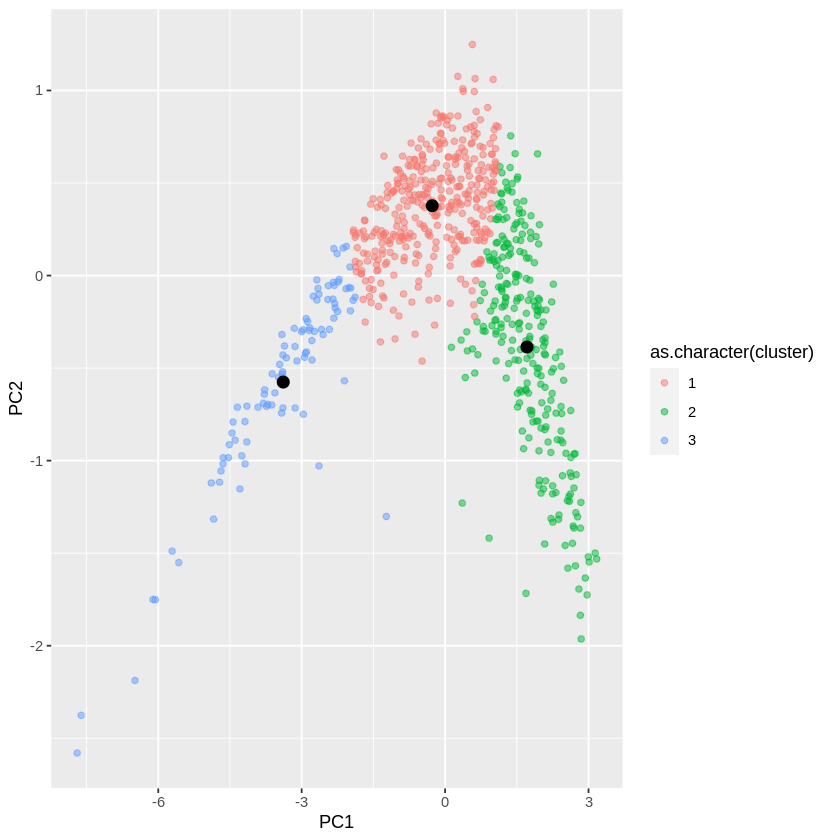

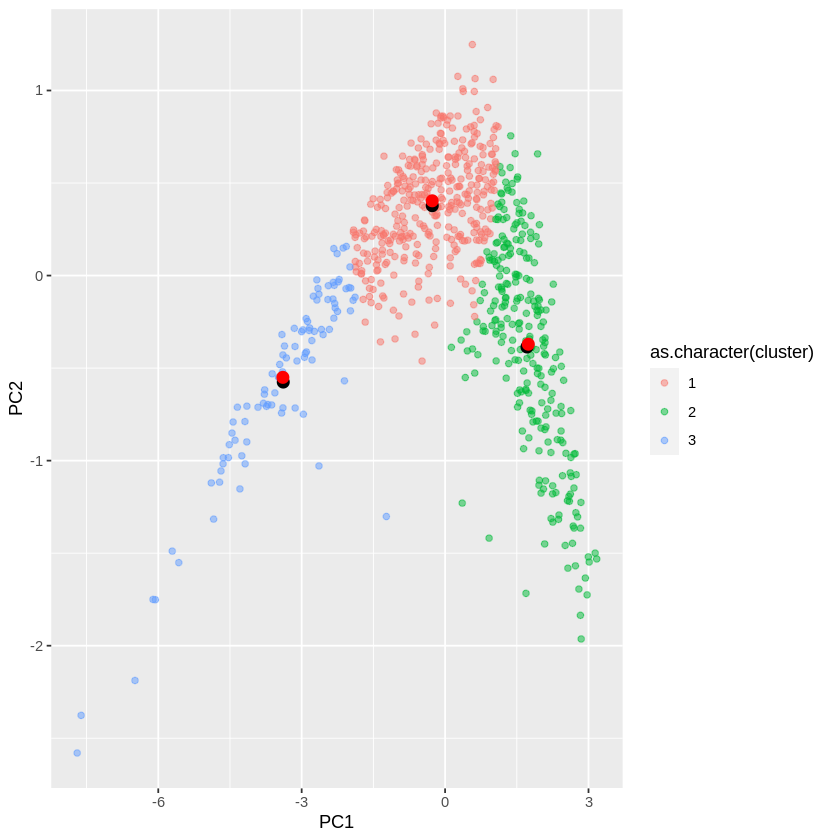

In [79]:
## plot centroids on scatter plot
a <- ggplot(ca3.pca, aes(x = PC1, y = PC2, color = as.character(cluster))) + 
        geom_point(alpha = 0.5) +
        annotate(geom = "point", x = centroid$PC1, y = centroid$PC2, 
                 colour = "black",size =3)

## plot centroid cells
b <- ggplot(ca3.pca, aes(x = PC1, y = PC2, color = as.character(cluster))) + 
        geom_point(alpha = 0.5) +
        annotate(geom = "point", x = centroid$PC1, y = centroid$PC2, 
                 colour = "black",size =3) +
        annotate(geom = "point", x = centroid.cells$PC1, y = centroid.cells$PC2, 
                 colour = "red",size =3)
p <- list(a,b)
multiplot(p, cols = 2)


### Find the cell...

In [95]:
# find by the coordinates 'which' position in 'pca.xplusid'

# cluster 1
centroid.c1 <- which(pca.xplusid$PC1 == centroid.cells$PC1[1] & pca.xplusid$PC2 == centroid.cells$PC2[1])
# pca.xplusid[centroid.c1,] # id 2068

# cluster 2
centroid.c2 <- which(pca.xplusid$PC1 == centroid.cells$PC1[2] & pca.xplusid$PC2 == centroid.cells$PC2[2])
# pca.xplusid[centroid.c2,] # id 788

#cluster 3
centroid.c3 <- which(pca.xplusid$PC1 == centroid.cells$PC1[3] & pca.xplusid$PC2 == centroid.cells$PC2[3])
# pca.xplusid[centroid.c3,] # id 2064

# which number from the slice this cells is?

# cluster 01 
# pca.xplusid[2058:2078,] # celula 13 do corte 2 do CA3 do animal AL4

# cluster 02
# pca.xplusid[778:798,] # celula 8 do corte 1 do CA3 do animal AS1

# cluster 03
# pca.xplusid[2054:2074,] # celula 9 do corte 2 do CA3 do animal AL4
